In [1]:
import time

import numpy as np
import pandas as pd
import preprocessing
import seaborn
from matplotlib import pyplot as plt
from sklearn.impute import *

In [2]:
print('Reading data...')
start_time = time.time()
data = pd.read_csv('./data/training_set_VU_DM.csv')
print(f'Data read in {time.time() - start_time} s')

Reading data...
Data read in 12.005536317825317 s


In [3]:
print(data.head())
print(data.describe())
nan_data_info = pd.DataFrame({'NaN Count': data.isna().sum(), 'Data Type': data.dtypes})
print(nan_data_info)

   srch_id            date_time  site_id  visitor_location_country_id  \
0        1  2013-04-04 08:32:15       12                          187   
1        1  2013-04-04 08:32:15       12                          187   
2        1  2013-04-04 08:32:15       12                          187   
3        1  2013-04-04 08:32:15       12                          187   
4        1  2013-04-04 08:32:15       12                          187   

   visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  prop_id  \
0                      NaN                   NaN              219      893   
1                      NaN                   NaN              219    10404   
2                      NaN                   NaN              219    21315   
3                      NaN                   NaN              219    27348   
4                      NaN                   NaN              219    29604   

   prop_starrating  prop_review_score  ...  comp6_rate_percent_diff  \
0                3   

In [4]:
preprocessing.parse_date(data)

In [ ]:
# print(' Filling missing values... ')
# property_columns = ['prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price']
# preprocessing.preprocess_null_mc(data, property_columns, bc_iter=32)
# print(data[property_columns]) 

In [5]:
print(data.prop_review_score.isnull().sum())
preprocessing.fill_by_regressor(data, regressor='ridge', feature_columns=['prop_starrating', 'prop_brand_bool', 'prop_location_score1', 'prop_log_historical_price'], target_column='prop_review_score')
print(data.prop_review_score.isnull().sum())

7364
Score: [-0.62328954 -0.62755173 -0.62658809]
Mean score -0.6258097870377055
0


In [6]:
print(data.prop_location_score2.isnull().sum())
preprocessing.fill_by_regressor(data, regressor='ridge', feature_columns=['prop_starrating', 'prop_brand_bool', 'prop_location_score1', 'prop_log_historical_price'], target_column='prop_location_score2')
print(data.prop_location_score2.isnull().sum())

1090348
Score: [-0.10064226 -0.10093836 -0.10128873]
Mean score -0.10095644735727477
0


In [7]:
min_affinity_score = np.nanmin(data.srch_query_affinity_score)
print(min_affinity_score)
fill_value = 2 * min_affinity_score
print(fill_value)
tmp_sqa_score = data.srch_query_affinity_score
preprocessing.preprocess_null_fill(data, columns=['srch_query_affinity_score'], fill_value=fill_value)
print(data.srch_query_affinity_score)

-326.5675
-653.135
0         -653.135
1         -653.135
2         -653.135
3         -653.135
4         -653.135
            ...   
4958342   -653.135
4958343   -653.135
4958344   -653.135
4958345   -653.135
4958346   -653.135
Name: srch_query_affinity_score, Length: 4958347, dtype: float64


In [8]:
data['score'] = data.click_bool + data.booking_bool * 5
data_features = data.drop(['click_bool', 'booking_bool', 'gross_bookings_usd', 'position'], axis=1)

drop_columns = ['date_time', 'orig_destination_distance']
mean_columns = ['visitor_hist_starrating', 'visitor_hist_adr_usd', 'comp_avg_rate', 'comp_avg_inv', 'comp_avg_rate_percent_diff']
data_filled = data_features.drop(columns=drop_columns)
preprocessing.merge_comp(data_filled)
# print(data_filled)

In [9]:
preprocessing.preprocess_null_fill_mean(data_filled)
nan_data_info = pd.DataFrame({'NaN Count': data_filled.isna().sum(), 'Data Type': data_filled.dtypes})
print(nan_data_info)
print(data_filled.describe())

                             NaN Count Data Type
srch_id                              0   float64
site_id                              0   float64
visitor_location_country_id          0   float64
visitor_hist_starrating              0   float64
visitor_hist_adr_usd                 0   float64
prop_country_id                      0   float64
prop_id                              0   float64
prop_starrating                      0   float64
prop_review_score                    0   float64
prop_brand_bool                      0   float64
prop_location_score1                 0   float64
prop_location_score2                 0   float64
prop_log_historical_price            0   float64
price_usd                            0   float64
promotion_flag                       0   float64
srch_destination_id                  0   float64
srch_length_of_stay                  0   float64
srch_booking_window                  0   float64
srch_adults_count                    0   float64
srch_children_count 

                              srch_id   site_id  visitor_location_country_id  \
srch_id                      1.000000  0.003331                    -0.006097   
site_id                      0.003331  1.000000                    -0.305921   
visitor_location_country_id -0.006097 -0.305921                     1.000000   
visitor_hist_starrating     -0.002375  0.075511                    -0.063428   
visitor_hist_adr_usd         0.000072  0.024268                    -0.018167   
prop_country_id             -0.005468 -0.312593                     0.482787   
prop_id                     -0.000166  0.002943                     0.000432   
prop_starrating             -0.001577  0.174845                    -0.112911   
prop_review_score           -0.002974 -0.071774                     0.064427   
prop_brand_bool             -0.003828 -0.196217                     0.182405   
prop_location_score1         0.000439  0.178399                    -0.121392   
prop_location_score2         0.001722  0

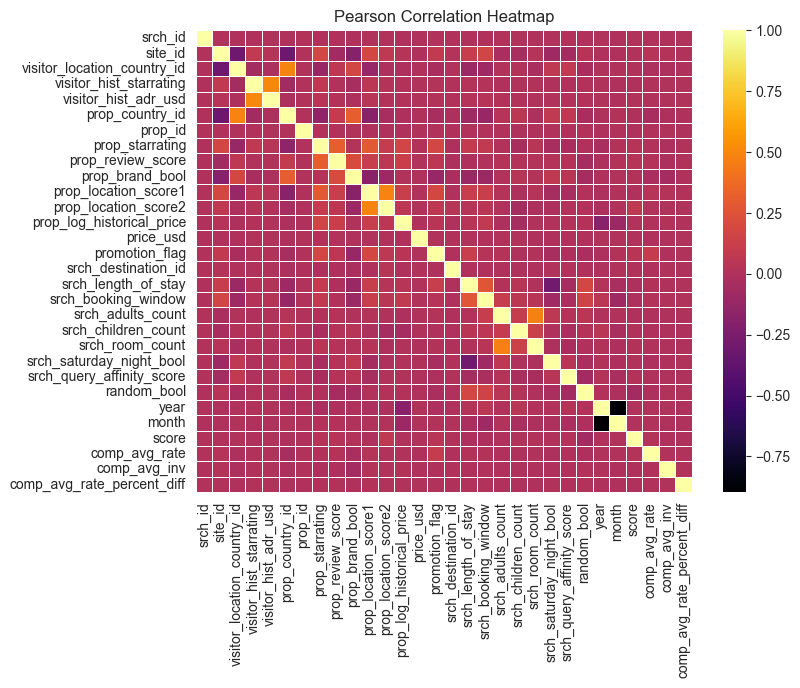

In [10]:
corr = data_filled.corr()
print(corr)

plt.figure(figsize=(8, 6))
seaborn.heatmap(corr, annot=False, cmap='inferno', fmt=".2f", linewidths=0.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

In [11]:
data_filled.to_csv('./data/filled_training_set.csv', index=False)